In [2]:
# compare model performance across different merges
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

RESULTS_DIR = "../results/"
os.makedirs(RESULTS_DIR, exist_ok=True)

In [ ]:
# load test results from csv files
test_results_postfix = "test_results.csv"
results_dfs = []
for model_name in ["ngram", "nBigram", "GPT"]:
    model_results_dir = os.path.join(RESULTS_DIR, model_name, "hparams_search")
    df = pd.read_csv(os.path.join(model_results_dir, f"{model_name}_{test_results_postfix}")) 
    df['model'] = model_name
    results_dfs.append(df)

all_results = pd.concat(results_dfs, ignore_index=True)

Common merges across models: {np.int64(200), np.int64(800)}


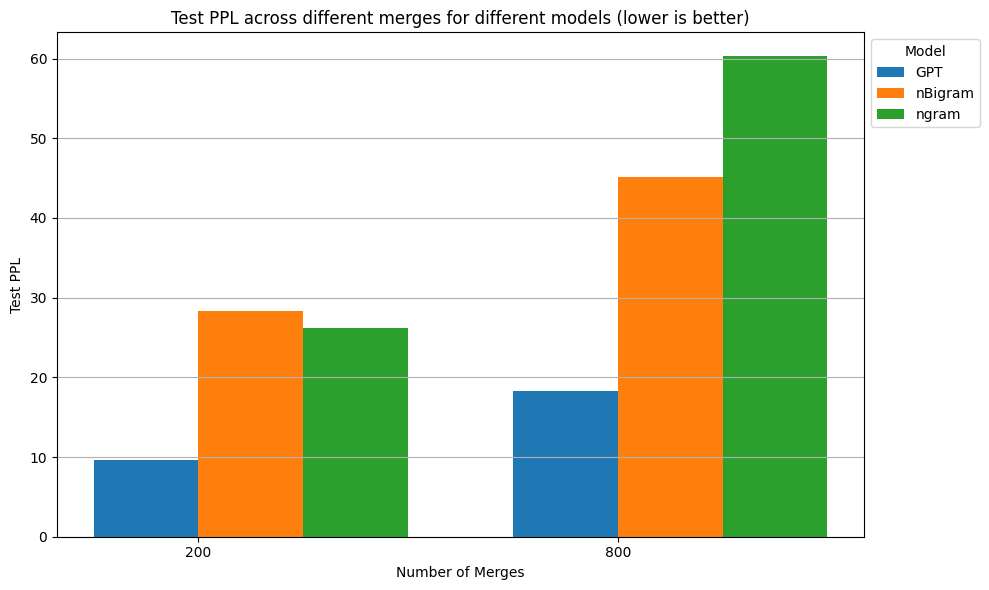

In [ ]:
# plot only for common merges across models
common_merges = set.intersection(*[set(all_results[all_results['model'] == model]['merges'].unique()) for model in all_results['model'].unique()])
print(f"Common merges across models: {common_merges}")  
best_per_merges = all_results[all_results['merges'].isin(common_merges)].sort_values(by=['merges', 'model', 'test_ppl']).groupby(['merges', 'model'], as_index=False).first()

# plot test PPL across merges for different models 
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(best_per_merges['merges'].unique()))   
width = 0.25 
for i, model in enumerate(best_per_merges['model'].unique()):
    model_data = best_per_merges[best_per_merges['model'] == model]
    ax.bar(x + i * width, model_data['test_ppl'], width, label=model)
ax.set_xlabel('Number of Merges')
ax.set_ylabel('Test PPL')
ax.set_title('Test PPL across different merges for different models (lower is better)')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(best_per_merges['merges'].unique())
# move legend outside the plot
ax.legend(title="Model" ,loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, axis='y')
plt.tight_layout()
# save the plot of PPL across merges
plt.savefig(os.path.join(RESULTS_DIR, "model_comparison_test_results_ppl.png"), dpi=150, bbox_inches="tight")
plt.show()
